In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dir_path = '/mnt/d/dailywork/01_Smear_seq/cancer/eso_squamou_cancer/geo/GSE53625/'
score_data = pd.read_csv(dir_path + 'ssgsea_score.csv', index_col=0)
patient_info = pd.read_csv(dir_path + 'patient_geo_accession.csv')
patient_info.head()

,Patient_ID,Sample_type,Sample_geo_accession
0,302,cancer tissue,GSM1296956
1,302,normal tissue,GSM1296957
2,303,cancer tissue,GSM1296958
3,303,normal tissue,GSM1296959
4,305,cancer tissue,GSM1296960


In [3]:
cancer_score = score_data[patient_info[patient_info.Sample_type == 'cancer tissue']['Sample_geo_accession'].tolist()]
normal_score = score_data[patient_info[patient_info.Sample_type == 'normal tissue']['Sample_geo_accession'].tolist()]

4.851261674016726e-102


/tmp/ipykernel_15271/3335913383.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Data', data=tem_df, fill=False, palette='Set2')
/tmp/ipykernel_15271/3335913383.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Type', y='Data', data=tem_df, jitter=True, color='black', size=5, alpha=0.7, palette='Set2')


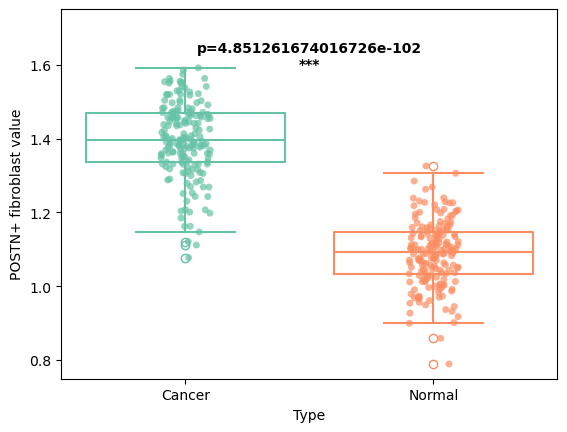

In [4]:
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
cd8 = 'CD8+ T cell'
postn = 'POSTN+ fibroblast'

tem_df = pd.DataFrame({
    "Type": ['Cancer'] * cancer_score.shape[1] + ['Normal'] * normal_score.shape[1],
    "Data": cancer_score[cancer_score.index == postn].values[0].tolist() + normal_score[normal_score.index == postn].values[0].tolist()
})
sns.boxplot(x='Type', y='Data', data=tem_df, fill=False, palette='Set2')
sns.stripplot(x='Type', y='Data', data=tem_df, jitter=True, color='black', size=5, alpha=0.7, palette='Set2')

t_stat, p_val = ttest_ind(tem_df[tem_df['Type'] == 'Cancer']['Data'], tem_df[tem_df['Type'] == 'Normal']['Data'])
if p_val > 0.05:
    sign = 'no significant difference'
elif p_val > 0.01:
    sign = '*'
else:
    sign = '***'
print(p_val)

plt.text(0.5, max(tem_df['Data']) * 1, f'p={p_val}\n{sign}',
         horizontalalignment='center', size='medium', color='black',
         weight='semibold')

plt.ylim(top=max(tem_df['Data']) * 1.1)
plt.ylabel(ylabel="POSTN+ fibroblast value")
plt.show()

-0.19748379071668282
0.008054169790983598


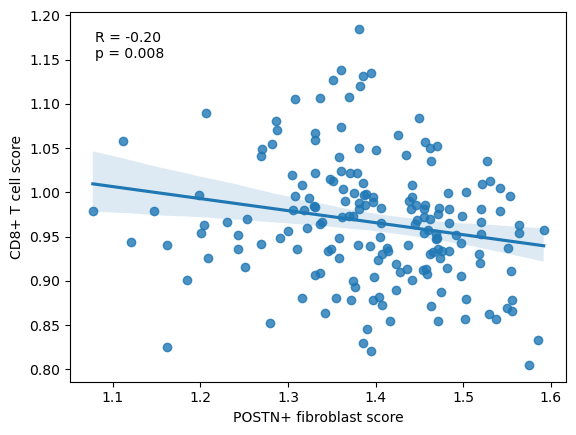

In [6]:
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

tem_df = pd.DataFrame({
    'CD8': cancer_score[cancer_score.index == 'CD8+ T cell'].values[0].tolist(),
    'POSTN': cancer_score[cancer_score.index == 'POSTN+ fibroblast'].values[0].tolist()
})

sns.regplot(x='POSTN', y='CD8', data=tem_df)

corr, p_val = pearsonr(tem_df['CD8'], tem_df['POSTN'])
print(corr)
print(p_val)

plt.text(0.05, 0.95, f'R = {corr:.2f}\np = {p_val:.3f}',
         transform=plt.gca().transAxes, verticalalignment='top')
plt.ylabel(ylabel='CD8+ T cell score')
plt.xlabel(xlabel='POSTN+ fibroblast score')
plt.savefig('CAF_score_With_T_score.pdf', format='pdf')
plt.show()


CD8+ T cell has finished
HLA-B+ fibroblast has finished
GSN+ fibroblast has finished
CFD+ fibroblast has finished
POSTN+ fibroblast has finished
C7+ fibroblast has finished
ELN+ fibroblast has finished
TAGLN+ fibroblast has finished
PTGDS+ fibroblast has finished
SRGN+ fibroblast has finished


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

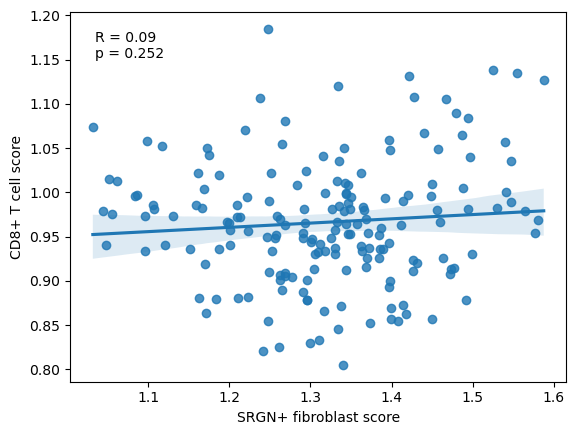

In [159]:
for idx in cancer_score.index.tolist():
    plt.clf()
    plt.figure()
    tem_df = pd.DataFrame({
        'CD8': cancer_score[cancer_score.index == 'CD8+ T cell'].values[0].tolist(),
        idx: cancer_score[cancer_score.index == idx].values[0].tolist()
    })

    sns.regplot(x=idx, y='CD8', data=tem_df)

    corr, p_val = pearsonr(tem_df['CD8'], tem_df[idx])

    plt.text(0.05, 0.95, f'R = {corr:.2f}\np = {p_val:.3f}',
            transform=plt.gca().transAxes, verticalalignment='top')

    plt.ylabel(ylabel='CD8+ T cell score')
    plt.xlabel(xlabel=f'{idx} score')
    plt.savefig(f'{idx}.png', dpi=150)
    print(f'{idx} has finished')

In [7]:
data = pd.read_csv(dir_path + "preparation_for_ssGSEA.tsv", sep='\t', index_col=0)
data.head()

,GSM1296956,GSM1296957,GSM1296958,GSM1296959,GSM1296960,GSM1296961,GSM1296962,GSM1296963,GSM1296964,GSM1296965,...,GSM1297304,GSM1297305,GSM1297306,GSM1297307,GSM1297308,GSM1297309,GSM1297310,GSM1297311,GSM1297312,GSM1297313
CTNNA2,3.929925,4.388201,4.395992,4.697154,4.476174,4.456455,4.075643,4.193375,4.851017,5.018208,...,3.303802,3.349361,3.605046,3.546976,3.294372,3.675983,3.252973,3.288352,3.123193,4.139961
SNTG1,5.485977,5.412374,5.627752,5.511075,5.753380,5.964689,5.824498,5.501963,5.525633,5.746703,...,6.983026,6.060983,5.600604,5.317658,5.913674,4.775737,5.800031,6.643709,5.977257,7.855444
CCDC7,9.363128,9.339831,7.867446,8.943584,8.475744,9.145798,9.060123,9.360496,8.620048,8.671547,...,8.567308,8.436002,8.746513,8.583297,8.817289,9.004857,8.428823,8.632197,8.534075,10.303096
DNAJB1,13.134106,13.789576,13.424588,14.181927,14.255647,14.294807,11.946494,14.717723,13.207616,14.315537,...,13.287464,14.901840,14.026521,13.262797,14.155728,13.803322,13.788715,14.925433,13.881569,14.477842
SHANK1,10.605277,10.518348,10.666406,10.924152,10.651861,11.188654,10.521152,10.922526,10.264530,10.649604,...,11.710136,11.862452,10.891326,10.780444,11.365654,11.150531,11.424053,11.331890,11.133855,12.797127


In [8]:
cancer_data = data[patient_info[patient_info.Sample_type == 'cancer tissue']['Sample_geo_accession'].tolist()]
cancer_data.shape

(27963, 179)

In [9]:
scaled_data = (cancer_data - cancer_data.min()) / (cancer_data.max() - cancer_data.min()) * 2 -1

In [10]:
scaled_data.to_csv(dir_path + 'TIDE_calculation.tsv', sep='\t')

In [11]:
exclusion_score = pd.read_csv(dir_path + 'TIDE_exclusion_score.csv')
exclusion_score['Responder'] = 'Exclusion_score'
exclusion_score.head()

,Patient,No benefits,Responder,TIDE,IFNG,MSI Expr Sig,Merck18,CD274,CD8,CTL.flag,Dysfunction,Exclusion,MDSC,CAF,TAM M2
0,GSM1297266,False,Exclusion_score,1.98,-0.01,0.52,-0.07,-0.67,-0.23,False,-0.84,1.98,0.14,0.12,0.01
1,GSM1296962,False,Exclusion_score,1.84,0.11,0.46,-0.01,-0.54,-0.14,False,-1.13,1.84,0.12,0.15,0.00
2,GSM1297138,False,Exclusion_score,1.77,0.06,0.44,-0.08,-0.65,0.22,False,-0.90,1.77,0.12,0.12,0.01
3,GSM1297080,False,Exclusion_score,1.75,0.15,0.58,0.11,-0.44,-0.08,False,-0.77,1.75,0.10,0.15,-0.01
4,GSM1297160,False,Exclusion_score,1.72,0.20,0.51,0.18,0.06,-0.01,False,-0.75,1.72,0.13,0.14,-0.03


In [12]:
exclusion_score = exclusion_score.pivot(index='Responder', columns='Patient', values='Exclusion')
exclusion_score.index.name = None
exclusion_score.columns.name = None
exclusion_score.head()

,GSM1296956,GSM1296958,GSM1296960,GSM1296962,GSM1296964,GSM1296966,GSM1296968,GSM1296970,GSM1296972,GSM1296974,...,GSM1297294,GSM1297296,GSM1297298,GSM1297300,GSM1297302,GSM1297304,GSM1297306,GSM1297308,GSM1297310,GSM1297312
Exclusion_score,0.95,1.24,1.36,1.84,1.19,0.92,1.35,1.49,1.07,1.13,...,1.3,1.11,1.37,1.19,1.39,1.32,1.46,1.19,1.46,1.3


In [13]:
exclusion_df = pd.concat([cancer_score, exclusion_score])

0.41993264492182547
4.864244147597304e-09


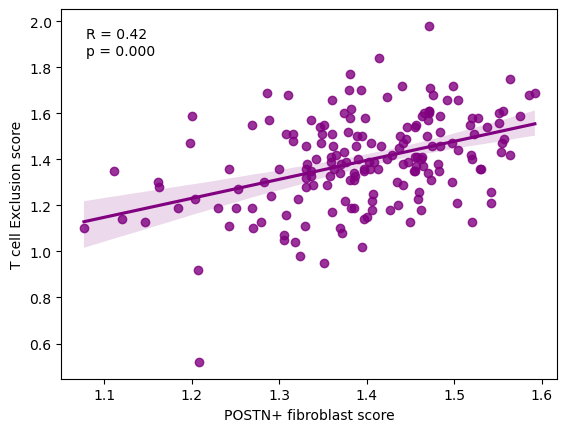

In [15]:
tem_df = pd.DataFrame({
    'CD8': exclusion_df[exclusion_df.index == 'Exclusion_score'].values[0].tolist(),
    'POSTN': exclusion_df[exclusion_df.index == 'POSTN+ fibroblast'].values[0].tolist()
})

sns.regplot(x='POSTN', y='CD8', data=tem_df, color='purple')

corr, p_val = pearsonr(tem_df['CD8'], tem_df['POSTN'])
print(corr)
print(p_val)

plt.text(0.05, 0.95, f'R = {corr:.2f}\np = {p_val:.3f}',
         transform=plt.gca().transAxes, verticalalignment='top')
plt.ylabel(ylabel='T cell Exclusion score')
plt.xlabel(xlabel='POSTN+ fibroblast score')
plt.savefig('TIDE_SCORE.pdf', format='pdf')
plt.show()


0.17026504246152366
0.02268511154852394


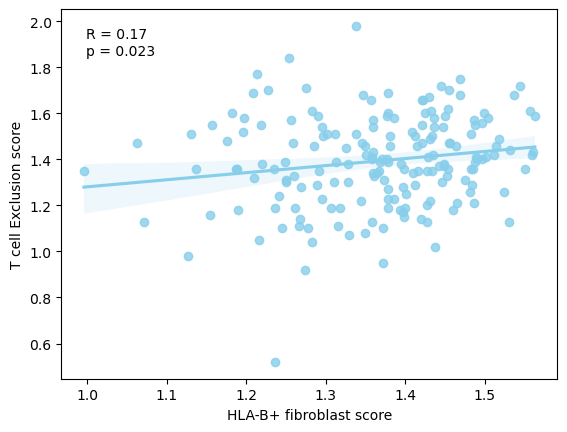

In [15]:
tem_df = pd.DataFrame({
    'CD8': exclusion_df[exclusion_df.index == 'Exclusion_score'].values[0].tolist(),
    'POSTN': exclusion_df[exclusion_df.index == 'HLA-B+ fibroblast'].values[0].tolist()
})

sns.regplot(x='POSTN', y='CD8', data=tem_df, color='skyblue')

corr, p_val = pearsonr(tem_df['CD8'], tem_df['POSTN'])
print(corr)
print(p_val)

plt.text(0.05, 0.95, f'R = {corr:.2f}\np = {p_val:.3f}',
         transform=plt.gca().transAxes, verticalalignment='top')
plt.ylabel(ylabel='T cell Exclusion score')
plt.xlabel(xlabel='HLA-B+ fibroblast score')
plt.show()
